In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import networkx as nx
import os
from sklearn.metrics import mutual_info_score
from scipy.stats import zscore
import pandas as pd
from sklearn.preprocessing import LabelEncoder
#import packages
import pandas as pd
import wget
from datetime import date
import gzip
import pandas as pd
from itertools import combinations

In [10]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix


# Create a DataFrame with the actual labels and cluster labels
data = pd.read_csv("results/gephi_node_attributes.csv")[['Label', 'modularity_class']]
data.columns = ['Label', 'Cluster']
contingency_table = pd.crosstab(data['Cluster'], data['Label'])
contingency_table


Label,ALL,BLCA,BRCA,COREAD,DLBC,ESCA,GBM,HNSC,KIRC,LAML,LUAD,MESO,NB,OV,PAAD,SCLC,SKCM,STAD
Cluster,,,,,,,,,,,,,,,,,,
0,0,0,0,1,0,0,0,0,0,0,1,0,29,0,0,51,0,0
1,6,1,2,41,0,7,1,1,0,1,6,0,0,6,13,5,1,15
2,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,46,0
3,0,9,2,1,0,23,0,35,0,0,10,1,0,1,13,0,0,3
4,20,0,0,0,31,0,0,0,0,23,0,0,0,0,0,0,0,1
5,0,1,2,0,0,2,0,0,0,0,16,0,0,18,1,0,0,3
6,0,6,7,0,0,1,29,1,32,0,13,20,1,9,1,1,4,1
7,0,1,34,0,0,2,0,0,0,0,13,0,0,0,0,0,0,1


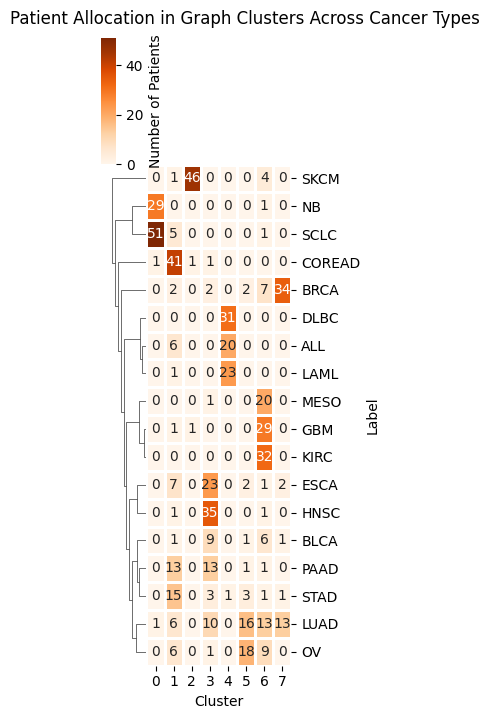

In [21]:
# Create a clustergram using seaborn's clustermap
g = sns.clustermap(contingency_table.T, 
                   cmap='Oranges', 
                   col_cluster=False,
                   annot=True, 
                   fmt='d', 
                   figsize=(3, 7), 
                   cbar_kws={'label': 'Number of Patients'}, 
                   linewidths=0.8, 
                   linecolor='white')

# Set the title
plt.suptitle('Patient Allocation in Graph Clusters Across Cancer Types', y=1.02)

# Display the plot
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
import os
from karateclub import Graph2Vec

idx = 0

mutDIR = "results/genomics"
protDIR = "results/proteomics"
geneDIR = "results/transcriptomics_old"

mutFILES = sorted(os.listdir(mutDIR))
proFILES = sorted(os.listdir(protDIR))
geneFILES = sorted(os.listdir(geneDIR))

all_net = None

#for idx in range(len(mutFILES)):
for idx in range(5):

    mnet = pd.read_csv(os.path.join(mutDIR, mutFILES[idx]), sep = "\t")
    pnet = pd.read_csv(os.path.join(protDIR,proFILES[idx]), sep = "\t", index_col=0)
    gnet = pd.read_csv(os.path.join(geneDIR, geneFILES[idx],'final', 'network.tsv.gz'), sep = "\t")

    gnet = gnet[['target','regulator','combined_confidences','gold_standard']]
    gnet.columns = ['Target','Source','score_transcriptomics','known_regulatory_link']
    gnet['rna_edgetype'] = 'transcriptomics'
    pnet.columns = ['Source',	'Target',	'score_proteomics',	'known_PPI',	'prot_edgetype']
    mnet.columns = ['Source', 'Target']
    mnet['mut_edgetype'] = 'genomics'

    net = pd.merge(pd.merge(pnet,gnet, on=['Source', 'Target'], how='outer'), mnet, on=['Source', 'Target'], how='outer')
    net.to_csv(os.path.join("results", 'disease_net', mutFILES[idx].split('_')[0] + '.csv'), index=False)

    subnet = net[['Source', 'Target']]
    subnet['label'] = mutFILES[idx].split('_')[0]


    # Convert the DataFrame to an edge list with attributes
    edges_with_attributes = subnet.apply(lambda row: (row['Source'], row['Target'], {'label': row['label']}), axis=1).tolist()

    # Create a directed NetworkX graph with edge attributes
    G = nx.DiGraph()
    G.add_edges_from(edges_with_attributes)

    # Optionally, print the graph's edges with their attributes to check
    print("Graph edges with attributes:")
    for u, v, attrs in G.edges(data=True):
        print(f"Edge ({u}, {v}): {attrs}")

    # Measure outdegree of each node
    outdegrees = dict(G.out_degree())

    # Sort nodes by outdegree (highest to lowest) and select the top 25 nodes
    top_25_nodes = sorted(outdegrees, key=outdegrees.get, reverse=True)[:25]
    print(top_25_nodes)

/home/surabhi/anaconda3/envs/patstrat/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


: 

In [1]:
all_net

NameError: name 'all_net' is not defined